In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [6]:
acc_vel_loc_sinrangos = pd.read_parquet('../data/interim/Acc_vel_loc_sinrangos.parquet')

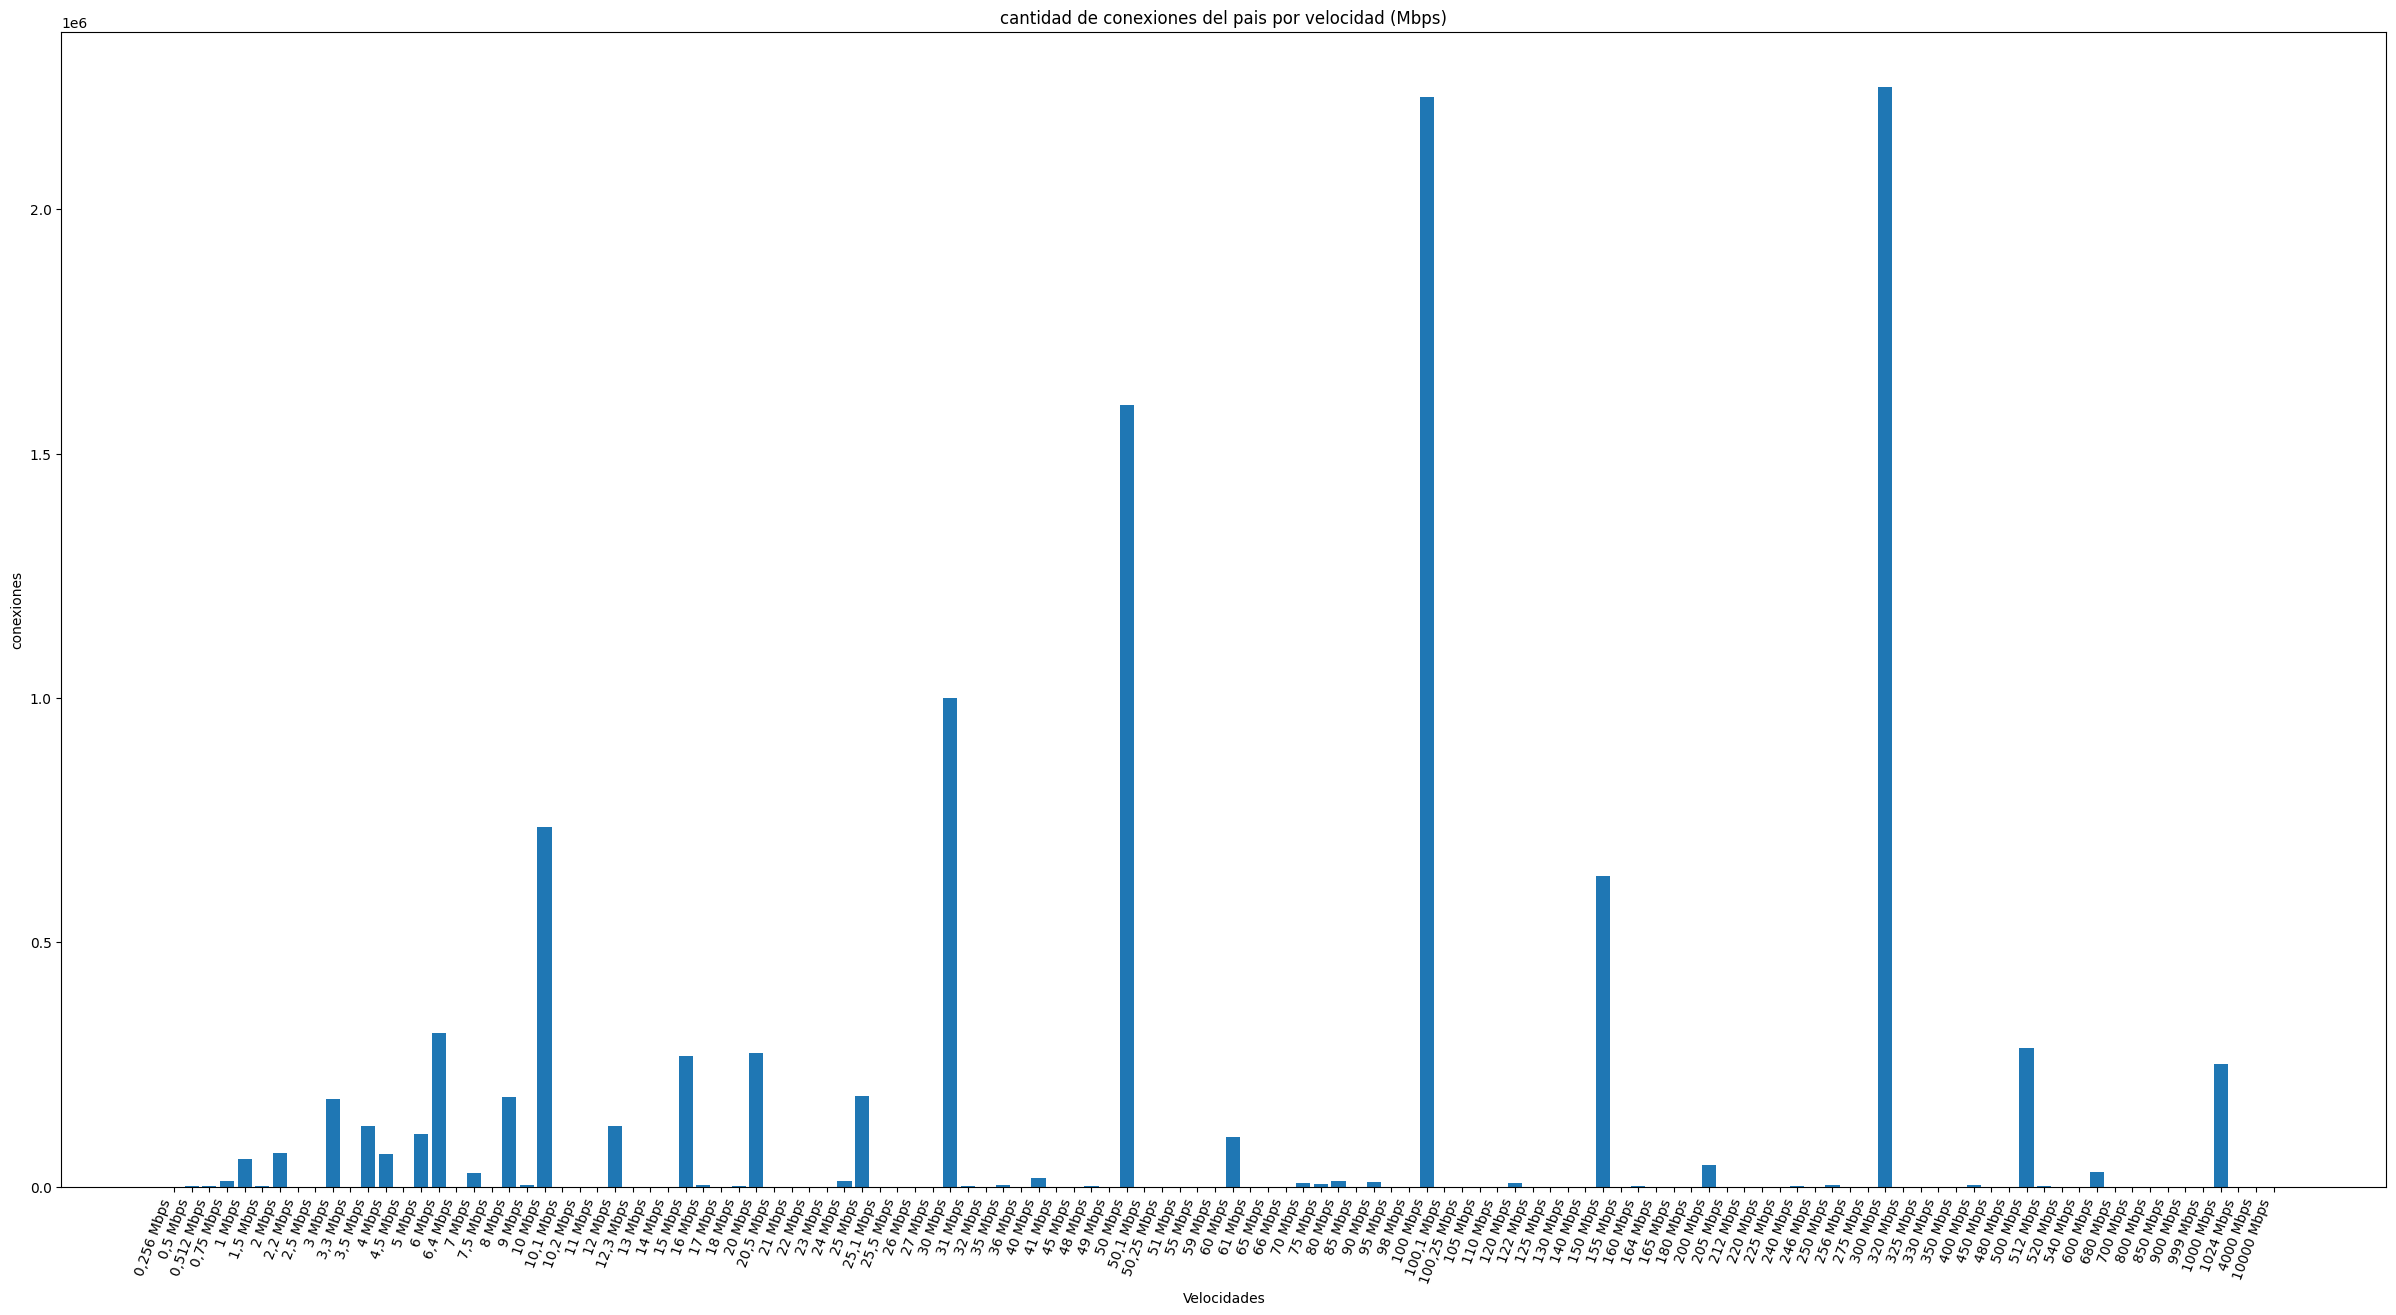

In [7]:
plt.figure(figsize=(30,15))
plt.bar(acc_vel_loc_sinrangos.columns[5:], [acc_vel_loc_sinrangos[col].sum() for col in acc_vel_loc_sinrangos.columns[5:]])
plt.xlabel('Velocidades')
plt.xticks(rotation=70, ha='right')
plt.ylabel('conexiones')
plt.title('cantidad de conexiones del pais por velocidad (Mbps)')
plt.show()

**Si bien no se alcanza a observar bien las velocidades, se pueden apreciar pilares donde se concentra la mayoria de datos, por lo que voy a seccionar**(*sumando las columnas mas cercanas por determinados rangos*) **en los 5 pilares mas grandes**
- **0.256mbps - 10mbps**
- **10mbps - 30mbps**
- **30mbps - 50mbps**
- **50mbps - 100mbps**
- **100mbps - 300mbps**
- **+ de 300mbps**

Voy a estar imprimiendo los rangos para despues copiarlos en la funcion pandas.Dataframe y generar columnas de cada una de estos rangos

*Con ILOC voy a revisar las columnas para despues con la funcion sum() de pandas hacer una suma por separado, de todos los valores que hay en cada columna*

In [8]:
#iloc[inicio_row:fin_row , inicio_col:fin_col] dejo la fila en 0 ya que solo me interesa saber que columnas voy a seleccionar
print(acc_vel_loc_sinrangos.iloc[:0,6:27])
print(acc_vel_loc_sinrangos.iloc[:0,27:50])
print(acc_vel_loc_sinrangos.iloc[:0,50:60])
print(acc_vel_loc_sinrangos.iloc[:0,60:77])
print(acc_vel_loc_sinrangos.iloc[:0,77:103])
print(acc_vel_loc_sinrangos.iloc[:0,103:])

Empty DataFrame
Columns: [0,5 Mbps, 0,512 Mbps, 0,75 Mbps, 1 Mbps, 1,5 Mbps, 2 Mbps, 2,2 Mbps, 2,5 Mbps, 3 Mbps, 3,3 Mbps, 3,5 Mbps, 4 Mbps, 4,5 Mbps, 5 Mbps, 6 Mbps, 6,4 Mbps, 7 Mbps, 7,5 Mbps, 8 Mbps, 9 Mbps, 10 Mbps]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [10,1 Mbps, 10,2 Mbps, 11 Mbps, 12 Mbps, 12,3 Mbps, 13 Mbps, 14 Mbps, 15 Mbps, 16 Mbps, 17 Mbps, 18 Mbps, 20 Mbps, 20,5 Mbps, 21 Mbps, 22 Mbps, 23 Mbps, 24 Mbps, 25 Mbps, 25,1 Mbps, 25,5 Mbps, 26 Mbps, 27 Mbps, 30 Mbps]
Index: []

[0 rows x 23 columns]
Empty DataFrame
Columns: [31 Mbps, 32 Mbps, 35 Mbps, 36 Mbps, 40 Mbps, 41 Mbps, 45 Mbps, 48 Mbps, 49 Mbps, 50 Mbps]
Index: []
Empty DataFrame
Columns: [50,1 Mbps, 50,25 Mbps, 51 Mbps, 55 Mbps, 59 Mbps, 60 Mbps, 61 Mbps, 65 Mbps, 66 Mbps, 70 Mbps, 75 Mbps, 80 Mbps, 85 Mbps, 90 Mbps, 95 Mbps, 98 Mbps, 100 Mbps]
Index: []
Empty DataFrame
Columns: [100,1 Mbps, 100,25 Mbps, 105 Mbps, 110 Mbps, 120 Mbps, 122 Mbps, 125 Mbps, 130 Mbps, 140 Mbps, 150 Mbps, 155 Mbps, 160 Mbp

**Despues de varias pruebas pude identificar los rangos de cada columna para sumarlas!**

*pisamos el DF reescribiendo las columnas de las velocidades*

In [9]:
acc_vel_loc_sinrangos = pd.DataFrame(
    {   'Provincia' : acc_vel_loc_sinrangos['Provincia'],
        'Partido' : acc_vel_loc_sinrangos['Partido'],
        'Localidad' : acc_vel_loc_sinrangos['Localidad'],
        'Otros(Mbps)' : acc_vel_loc_sinrangos['Otros'],
        '<10 Mbps' : acc_vel_loc_sinrangos.iloc[:,6:27].sum(axis=1),
        '10-30 Mbps' : acc_vel_loc_sinrangos.iloc[:,27:50].sum(axis=1),
        '30-50 Mbps' : acc_vel_loc_sinrangos.iloc[:,50:60].sum(axis=1),
        '50-100 Mbps' : acc_vel_loc_sinrangos.iloc[:,60:77].sum(axis=1),
        '100-300 Mbps' : acc_vel_loc_sinrangos.iloc[:,77:103].sum(axis=1),
        '+ de 300 Mbps' : acc_vel_loc_sinrangos.iloc[:,103:].sum(axis=1)
    }
)


**y *voilá* con esto nos queda un DF mas facil de mirarse**

In [10]:
acc_vel_loc_sinrangos.head(5)

,Provincia,Partido,Localidad,Otros(Mbps),<10 Mbps,10-30 Mbps,30-50 Mbps,50-100 Mbps,100-300 Mbps,+ de 300 Mbps
index,,,,,,,,,,
0,BUENOS AIRES,25 de Mayo,25 de Mayo,0.0,914.0,3857.0,674.0,702.0,95.0,3.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,0.0,59.0,5.0,0.0,0.0,0.0,0.0
2,BUENOS AIRES,25 de Mayo,Del Valle,0.0,192.0,0.0,0.0,0.0,0.0,0.0
3,BUENOS AIRES,25 de Mayo,Ernestina,0.0,75.0,0.0,0.0,0.0,0.0,0.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,0.0,180.0,0.0,0.0,1.0,0.0,0.0


Ahora que ya tengo un DF mas reducido y mas claro,puedo intentar chequear con barras cual es la velocidad de descarga mas recurrente en el pais

In [11]:
acc_vel_loc_sinrangos.iloc[:6,3:]

,Otros(Mbps),<10 Mbps,10-30 Mbps,30-50 Mbps,50-100 Mbps,100-300 Mbps,+ de 300 Mbps
index,,,,,,,
0,0.0,914.0,3857.0,674.0,702.0,95.0,3.0
1,0.0,59.0,5.0,0.0,0.0,0.0,0.0
2,0.0,192.0,0.0,0.0,0.0,0.0,0.0
3,0.0,75.0,0.0,0.0,0.0,0.0,0.0
4,0.0,180.0,0.0,0.0,1.0,0.0,0.0
5,0.0,5.0,0.0,0.0,0.0,0.0,0.0


In [12]:
otros = acc_vel_loc_sinrangos['Otros(Mbps)'].sum()
menores_a_10 = acc_vel_loc_sinrangos['<10 Mbps'].sum()
rango10_30 = acc_vel_loc_sinrangos['10-30 Mbps'].sum()
rango30_50 = acc_vel_loc_sinrangos['30-50 Mbps'].sum()
rango50_100 = acc_vel_loc_sinrangos['50-100 Mbps'].sum()
rango100_300 = acc_vel_loc_sinrangos['100-300 Mbps'].sum()
mayor_300 = acc_vel_loc_sinrangos['+ de 300 Mbps'].sum()


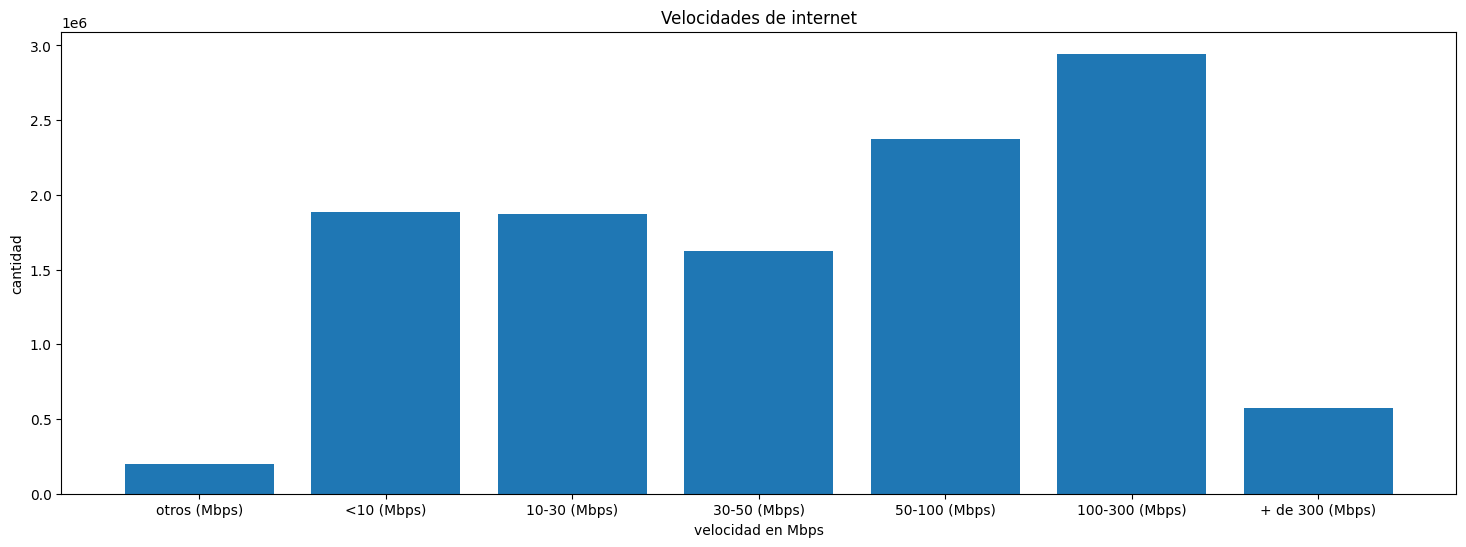

In [13]:
plt.figure(figsize=(18,6))
plt.bar(['otros (Mbps)','<10 (Mbps)', '10-30 (Mbps)','30-50 (Mbps)','50-100 (Mbps)','100-300 (Mbps)','+ de 300 (Mbps)'], [otros,menores_a_10,rango10_30,rango30_50,rango50_100,rango100_300,mayor_300])
plt.xlabel('velocidad en Mbps')
plt.ylabel('cantidad')
plt.title('Velocidades de internet')
plt.show()

*Por el momento dejo esto sin mas observaciones, volvere en caso de encontrar la forma de obtener las ubicaciones por longitud y latitud para graficarlo en un mapa*

Vamos a seguir probando mas graficos a ver que otras variantes podemos obtener de los otros datos de las siguientes hojas

In [14]:
accesos_tecnologia = pd.read_parquet("../data/interim/accesos_tecnologia")
accesos_tecnologia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
index,,,,,,,,,
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0


Creo que podria encontrar algo interesante si sumo los datos de los servicios por tecnologia durante año

In [15]:
acc_tec_suma_anual = accesos_tecnologia.drop(['Provincia'],axis=1)
acc_tec_suma_anual = acc_tec_suma_anual.groupby(['Año','Trimestre']).sum().reset_index()

In [46]:
acc_tec_suma_anual.head(10)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2014,1,3697066.0,2407330.0,150323.0,70749.0,72930.0,6398398.0
1,2014,2,3708882.0,2461670.0,149363.0,72405.0,72148.0,6464468.0
2,2014,3,3714764.0,2569868.0,155494.0,85096.0,70049.0,6595271.0
3,2014,4,3764038.0,2536219.0,149682.0,76984.0,71573.0,6598496.0
4,2015,1,3756153.0,2668248.0,168188.0,79098.0,66045.0,6737732.0
5,2015,2,3767821.0,2756294.0,150839.0,82077.0,59157.0,6816188.0
6,2015,3,3788696.0,2840203.0,162663.0,84530.0,58976.0,6935068.0
7,2015,4,3803024.0,2898226.0,139187.0,85726.0,58668.0,6984831.0
8,2016,1,3792493.0,2806359.0,164371.0,85370.0,58763.0,6907356.0
9,2016,2,3782085.0,3035272.0,167788.0,85452.0,59482.0,7130079.0


*Solo por curiosidad voy a chequear como se veria si se traspone el DF*

In [34]:
acc_tec_suma_anual.transpose()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
Año,2014,2014,2014,2014,2015,2015,2015,2015,2016,2016,...,2021,2022,2022,2022,2022,2023,2023,2023,2023,2024
Trimestre,1,2,3,4,1,2,3,4,1,2,...,4,1,2,3,4,1,2,3,4,1
ADSL,3697066.0,3708882.0,3714764.0,3764038.0,3756153.0,3767821.0,3788696.0,3803024.0,3792493.0,3782085.0,...,1657615.0,1533240.0,1468333.0,1395277.0,1315373.0,1204417.0,1006509.0,897895.0,836390.0,774475.0
Cablemodem,2407330.0,2461670.0,2569868.0,2536219.0,2668248.0,2756294.0,2840203.0,2898226.0,2806359.0,3035272.0,...,5984240.0,6073426.0,5979214.0,6031970.0,6037457.0,6002582.0,5997149.0,6018832.0,6022532.0,5986957.0
Fibra óptica,150323.0,149363.0,155494.0,149682.0,168188.0,150839.0,162663.0,139187.0,164371.0,167788.0,...,2072236.0,2219533.0,2723285.0,2871541.0,3060575.0,3243411.0,3463988.0,3708718.0,3908183.0,4015101.0
Wireless,70749.0,72405.0,85096.0,76984.0,79098.0,82077.0,84530.0,85726.0,85370.0,85452.0,...,523107.0,545814.0,556243.0,557110.0,572969.0,576647.0,581823.0,581436.0,585760.0,598682.0
Otros,72930.0,72148.0,70049.0,71573.0,66045.0,59157.0,58976.0,58668.0,58763.0,59482.0,...,252596.0,251996.0,231609.0,235230.0,221740.0,214838.0,202428.0,200027.0,194796.0,257941.0
Total,6398398.0,6464468.0,6595271.0,6598496.0,6737732.0,6816188.0,6935068.0,6984831.0,6907356.0,7130079.0,...,10489794.0,10624009.0,10958684.0,11091128.0,11208114.0,11241895.0,11251897.0,11406908.0,11547661.0,11633156.0


# Esto me genera una idea...

**Voy a revisar el crecimiento con lineas, para esto voy a omitir la columna "TOTAL", asi no me distorsiona el grafico y puedo ver cada una de las lineas de los servicios**

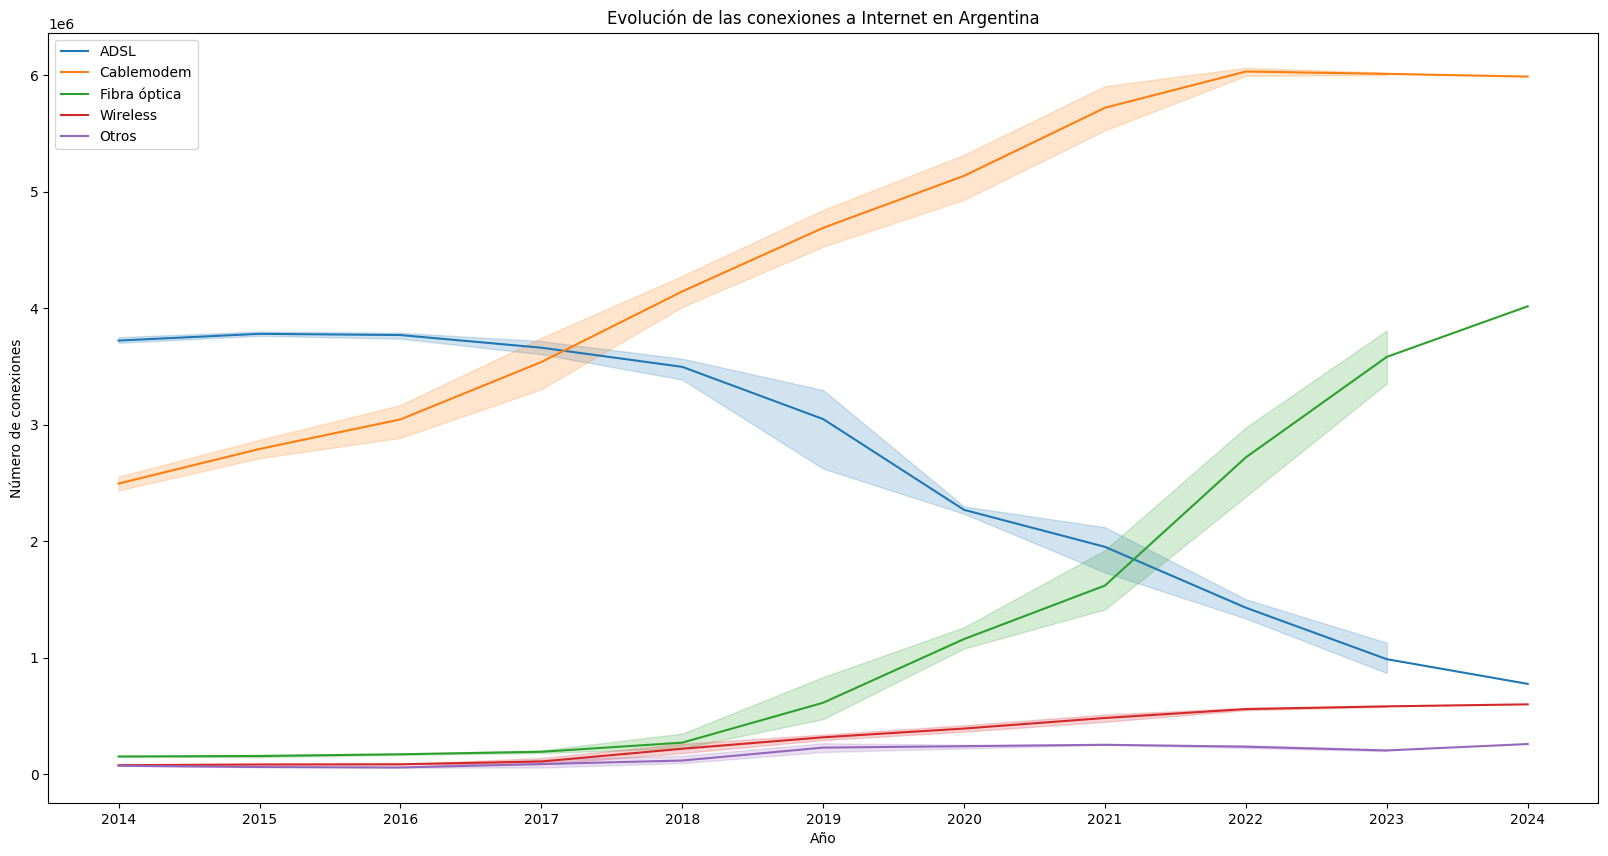

In [43]:
#aca quiero ver que resultados nos da el crecimiento de las tecnologias que dan acceso a internet
plt.figure(figsize=(20, 10))
sns.lineplot(data=acc_tec_suma_anual, x='Año', y='ADSL', label='ADSL')
sns.lineplot(data=acc_tec_suma_anual, x='Año', y='Cablemodem', label='Cablemodem')
sns.lineplot(data=acc_tec_suma_anual, x='Año', y='Fibra óptica', label='Fibra óptica')
sns.lineplot(data=acc_tec_suma_anual, x='Año', y='Wireless', label='Wireless')
sns.lineplot(data=acc_tec_suma_anual, x='Año', y='Otros', label='Otros')

plt.title('Evolución de las conexiones a Internet en Argentina')
plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.legend()
plt.show()